### **Nama : Maulana Agus Setiawan**
### **Link Dataset : https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset**

#### Import Library

In [22]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback

#### Load Data

In [23]:
path = 'PetImages'
files = os.listdir(path)

for file in files:
    print(file)

Dog
Cat


#### Remove file yang berekstensi Zone.Identifier

In [24]:
import os

def delete_identifier_files(folder_path):
    for root, dirs, files in os.walk(path):
        for file_name in files:
            if file_name.endswith(":Zone.Identifier"):
                file_path = os.path.join(root, file_name)
                try:
                    os.remove(file_path)
                except Exception as e:
                    print(f"Gagal menghapus file {file_path}. Error: {e}")

cat = os.path.join(path, '/Cat')
dog = os.path.join(path, '/Dog')

delete_identifier_files(cat)
delete_identifier_files(dog)

#### Display Gambar

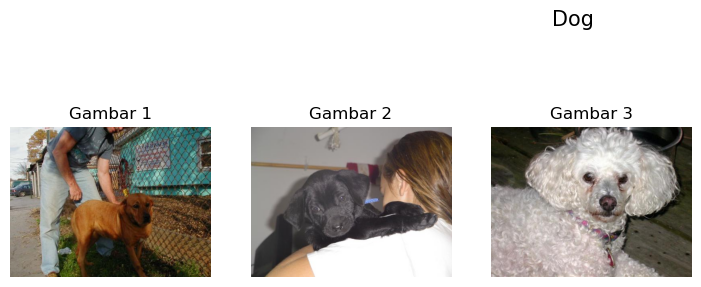

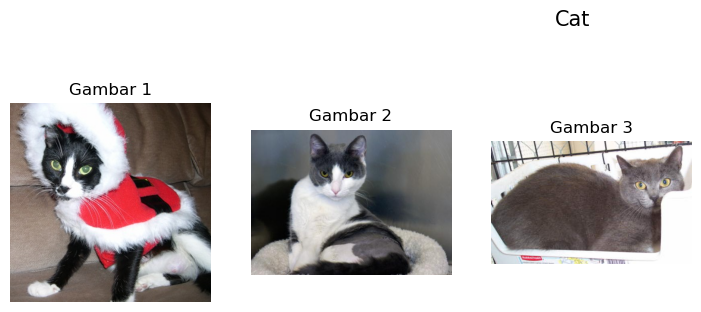

In [39]:
def display_image(path, category):
    image_files = os.listdir(os.path.join(path, category))
    selected_images = image_files[:3]
    plt.figure(figsize=(15, 7))
    for i, image_name in enumerate(selected_images, 1):
        image_path = os.path.join(path, category, image_name)
        image = Image.open(image_path)
        plt.subplot(2, 5, i)
        plt.imshow(image)
        plt.title(f"Gambar {i}")
        plt.axis("off")
    plt.suptitle(category.capitalize(), fontsize=15)
    plt.show()

for file in files:
    display_image(path, file)

#### Data Info

In [26]:
jumlah_data = 0
for animal in files:
    images = len(os.listdir(f'{path}/{animal}'))
    print(f'{animal} images: ', images)
    jumlah_data += images
print (f'Total Images : {jumlah_data}')

Dog images:  12499
Cat images:  12499
Total Images : 24998


#### Split Data dengan rasio 80:20

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [28]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [29]:
class_names = list(train_generator.class_indices.keys())
class_names

['Cat', 'Dog']

#### Modelling Sequential

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [32]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

#### Fungsi Callbacks

In [33]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            self.model.stop_training = True
            print("\nAkurasi telah terpenuhi > 93%!")

callbacks = myCallback()

#### Training Model

In [34]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/100


625/625 [==============================] - 78s 123ms/step - loss: 0.6556 - accuracy: 0.6065 - val_loss: 0.5876 - val_accuracy: 0.6819
Epoch 2/100
625/625 [==============================] - 77s 123ms/step - loss: 0.5527 - accuracy: 0.7161 - val_loss: 0.5163 - val_accuracy: 0.7567
Epoch 3/100
625/625 [==============================] - 77s 124ms/step - loss: 0.4754 - accuracy: 0.7772 - val_loss: 0.3986 - val_accuracy: 0.8145
Epoch 4/100
625/625 [==============================] - 77s 123ms/step - loss: 0.4192 - accuracy: 0.8105 - val_loss: 0.3819 - val_accuracy: 0.8329
Epoch 5/100
625/625 [==============================] - 77s 123ms/step - loss: 0.3645 - accuracy: 0.8370 - val_loss: 0.3224 - val_accuracy: 0.8637
Epoch 6/100
625/625 [==============================] - 77s 123ms/step - loss: 0.3444 - accuracy: 0.8518 - val_loss: 0.3391 - val_accuracy: 0.8537
Epoch 7/100
625/625 [==============================] - 80s 127ms/step - loss: 0.3086 - accuracy: 0.8698 - val_loss: 0.2890 - val_accurac

#### Evaluasi Model

In [35]:
model.evaluate(val_generator)

4998/4998 [==============================] - 21s 4ms/step - loss: 0.1731 - accuracy: 0.9304


[0.1731143742799759, 0.9303721785545349]

#### Grafik pergerakan metrik akurasi dan loss pada training maupun validation

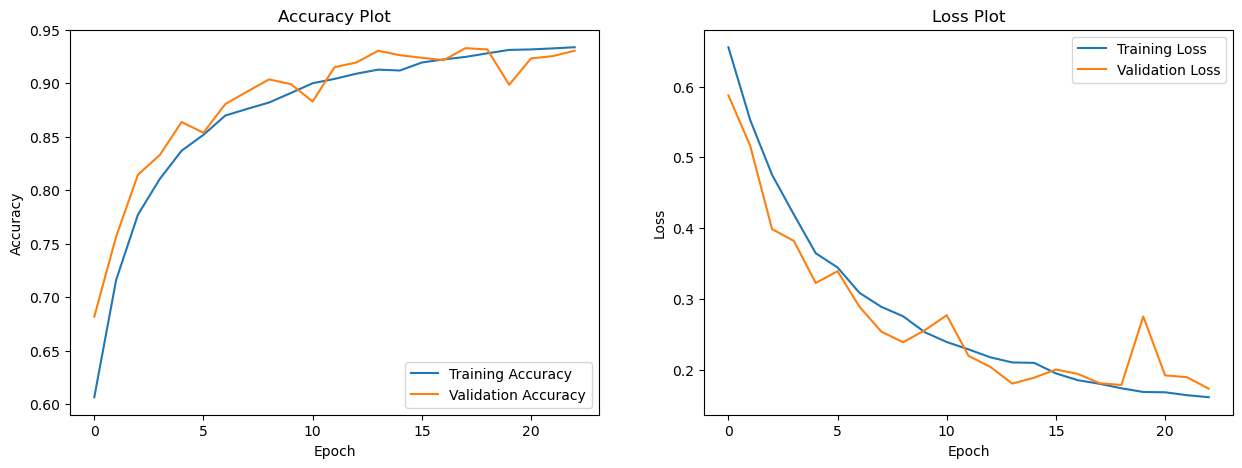

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Menyimpan Model dalam format TF-Lite

In [37]:
save = 'saved_model'
tf.saved_model.save(model, save)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [38]:
converter = tf.lite.TFLiteConverter.from_saved_model(save)
tflite_model = converter.convert()

with open('MyModel.tflite', 'wb') as f:
    f.write(tflite_model)

2024-01-17 21:08:43.511117: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-17 21:08:43.511248: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-17 21:08:43.514809: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2024-01-17 21:08:43.515888: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-17 21:08:43.515898: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2024-01-17 21:08:43.519068: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2024-01-17 21:08:43.520062: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-17 21:08:43.566546: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: saved_model
2024-01-17 21:08:43.57